### Placing banners. Task from the course "Finding a structure in the data" from Yandex and MFTI. 

In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

Read, preprocess the dat file. And remove nan values from latitude and longitude

In [86]:
df = pd.read_csv("checkins.dat", sep='|', skipinitialspace=True, skiprows=[1], header=[0])

C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [87]:
df.drop(df.tail(1).index,inplace=True)

In [88]:
df.dropna(axis=0, inplace=True)

In [89]:
df.shape

(396634, 6)

In [90]:
df_subset.columns

Index(['latitude', 'longitude'], dtype='object')

In [91]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [92]:
df.head()

,id,user_id,venue_id,latitude,longitude,created_at
1,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
3,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
7,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
9,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
10,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18


By using MeanShift algorithm form clusters. In this case dataframe was cutted, because of computation time of MeanShift algorithm. On whole dataset MeanShift algorithm will execute about 1 hour.

In [93]:
from sklearn.cluster import MeanShift

In [95]:
df_subset = df.iloc[:100000, :].loc[:, ['latitude', 'longitude']]
df_subset.shape

(100000, 2)

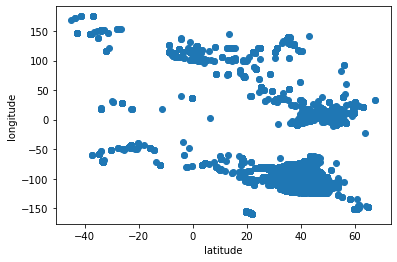

In [98]:
plt.scatter(df_subset['latitude'], df_subset['longitude'])
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()

In [99]:
%%time
ms = MeanShift(bandwidth=0.1).fit(df_subset)

Wall time: 3min 16s


In [103]:
print('Number of clusters:',len(ms.cluster_centers_))

Number of clusters: 3231


Delete clusters, which contain less than 15 objects in them

In [122]:
centers, counts = np.unique(ms.labels_, return_counts=True)
big_clust_index = []

for c, n in zip(centers, counts):
    if n>15:
        print(c, n)
        big_clust_index.append(c)

0 12506
1 4692
2 3994
3 3363
4 3526
5 2409
6 2297
7 1601
8 1526
9 1378
10 1298
11 1081
12 1006
13 1007
14 714
15 868
16 870
17 645
18 808
19 807
20 612
21 722
22 754
23 747
24 539
25 656
26 580
27 577
28 679
29 564
30 594
31 907
32 449
33 502
34 452
35 104
36 431
37 410
38 388
39 400
40 369
41 367
42 384
43 347
44 345
45 342
46 314
47 273
48 314
49 316
50 355
51 281
52 336
53 271
54 293
55 246
56 263
57 258
58 254
59 243
60 229
61 291
62 182
63 155
64 137
65 186
66 193
67 197
68 196
69 191
70 189
71 187
72 203
73 178
74 192
75 169
76 173
77 153
78 157
79 220
80 199
81 164
82 162
83 126
84 155
85 152
86 56
87 100
88 141
89 142
90 190
91 117
92 138
93 135
94 133
95 131
96 134
97 122
98 130
99 132
100 109
101 135
102 135
103 120
104 119
105 116
106 110
107 91
108 114
109 79
110 114
111 98
112 112
113 67
114 74
115 110
116 126
117 106
118 110
119 74
120 103
121 102
122 101
123 100
124 85
125 99
126 72
127 99
128 118
129 98
130 27
131 84
132 95
133 99
134 95
135 97
136 97
137 92
138 91
139 

In [123]:
len(big_clust_index)

592

In [124]:
big_clust = ms.cluster_centers_[big_clust_index]

In [127]:
big_clust

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       ...,
       [  41.61853175,  -88.44556818],
       [  39.2494686 ,  -77.1821271 ],
       [  38.65877915,  -76.8856871 ]])

Read the txt file with coordinates of offices

In [233]:
df_carn = pd.read_csv("CarnivalCruiseLine.txt", header=None)
df_carn.rename({0: 'latitude', 1: 'longitude'}, axis=1, inplace=True)

df_carn[['longitude', 'city1', 'city2']] = df_carn['longitude'].str.split(expand=True)
df_carn.drop(columns=['city1', 'city2'], inplace=True)
df_carn.longitude = df_carn.longitude.astype('float')

In [234]:
df_carn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   6 non-null      float64
 1   longitude  6 non-null      float64
dtypes: float64(2)
memory usage: 224.0 bytes


Calculate the distance between banners and offices and choose top 20 minimum distances

In [236]:
def dist(x, y):
    return np.sqrt(np.sum((x-y)**2))

In [256]:
min_distance_from_office = np.empty(big_clust.shape[0])

for num_i, i in enumerate(big_clust):
    min_distance = dist(i, df_carn.loc[0, :])
    for j in range(len(df_carn)):
        distance = dist(i, df_carn.loc[j, :])
        if distance < min_distance:
            min_distance = distance
    min_distance_from_office[num_i] = min_distance

In [261]:
min_dist_indices = np.argsort(min_distance_from_office)[:20]
np.set_printoptions(suppress=True)
big_clust[min_dist_indices]

array([[ -33.86063043,  151.20477593],
       [  52.37296399,    4.89231722],
       [  25.84567226,  -80.3188906 ],
       [  51.50299126,   -0.12553729],
       [  33.80987796, -118.14892381],
       [  25.78581242,  -80.21793804],
       [  25.70534972,  -80.28342874],
       [  26.01009825,  -80.19999059],
       [  33.88832534, -118.04892817],
       [  33.87298601, -118.36209115],
       [  33.97257482, -118.16837067],
       [  26.13884379,  -80.33434684],
       [  33.98393587, -118.00740497],
       [  26.12086266,  -80.15890668],
       [  33.81730643, -117.89124917],
       [  34.06039755, -118.24870903],
       [  33.67430266, -117.85878927],
       [  26.20058464,  -80.25071613],
       [  34.03548695, -118.43899772],
       [  34.13146015, -118.11801181]])

In [263]:
from geopy.geocoders import Nominatim
 
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
location = geolocator.geocode(Latitude+","+Longitude)

In [267]:
for clust in big_clust[min_dist_indices]:
    Latitude = clust[0]
    Longitude = clust[1]
    location = geolocator.geocode(str(Latitude)+","+str(Longitude))
    print(clust,': ',location)

[-33.86063043 151.20477593] :  Sydney - Observatory Hill, Upper Fort Street, Millers Point, Sydney, Council of the City of Sydney, New South Wales, 2000, Australia
[52.37296399  4.89231722] :  Dam, Damrak, Centrum, Amsterdam, Noord-Holland, Nederland, 1012MH, Nederland
[ 25.84567226 -80.3188906 ] :  8001, Northwest 74th Avenue, Medley Mobile Homes, Medley, Miami-Dade County, Florida, 33166, United States
[51.50299126 -0.12553729] :  Richmond Terrace, Westminster, City of Westminster, London, Greater London, England, SW1A 2JL, United Kingdom
[  33.80987796 -118.14892381] :  Long Beach Groundwater Treatment Plant, East Spring Street, Long Beach, California, 90808, United States
[ 25.78581242 -80.21793804] :  1355, Northwest 12th Street, Miami, Miami-Dade County, Florida, 33125, United States
[ 25.70534972 -80.28342874] :  1500, San Remo Avenue, South Miami, Miami-Dade County, Florida, 33146, United States
[ 26.01009825 -80.19999059] :  5604, Hollywood Boulevard, Hollywood, Broward County